# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
import h5py
from imagen_shap_visualization import *

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Get the data

In [ ]:
# get_data

In [ ]:
# load the training data



In [2]:
# load the holdout data

h5_dir = "/ritter/share/data/IMAGEN/h5files/newholdout-fu3-espad-fu3-19a-binge-n102.h5"
data = h5py.File(h5_dir, 'r')
data.keys(), data.attrs.keys()

X = data['X'][()]
# y = data[data.attrs['labels'][0]][:4]
X_col_names = data.attrs['X_col_names']
X.shape, len(X_col_names)

((102, 723), 723)

### 4.1.2. Get the shap value

In [ ]:
# get_shap_value

In [ ]:
# multiprocessing suggestion

### 4.1.3. Get the plot

In [ ]:
# get_plot

In [ ]:
MODEL = ["SVM-RBF"]
to_shap(MODEL, X)

<b> Load the dataset </b>

In [3]:
with open('explainers/SVM-rbf0_holdout_shap.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

<b> ROI 01: summary bar plot of feature importnace </b>

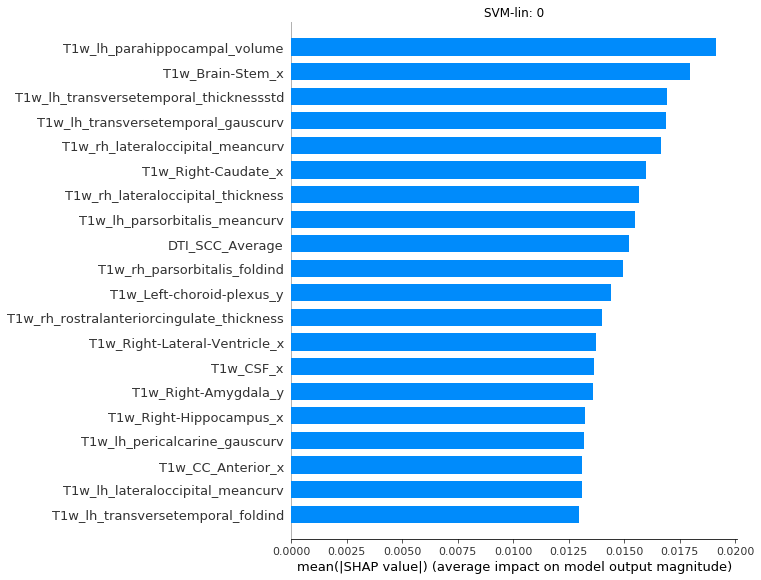

In [4]:
# plot
for i in [0]:
    shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
    plt.title(model_name+": "+str(i))
    plt.savefig(f"figures/SVM-rbf0_holdout_bar.pdf", bbox_inches='tight')

<b> ROI 02: swarm plot showing shap values vs feature values ordered by feature importance </b>

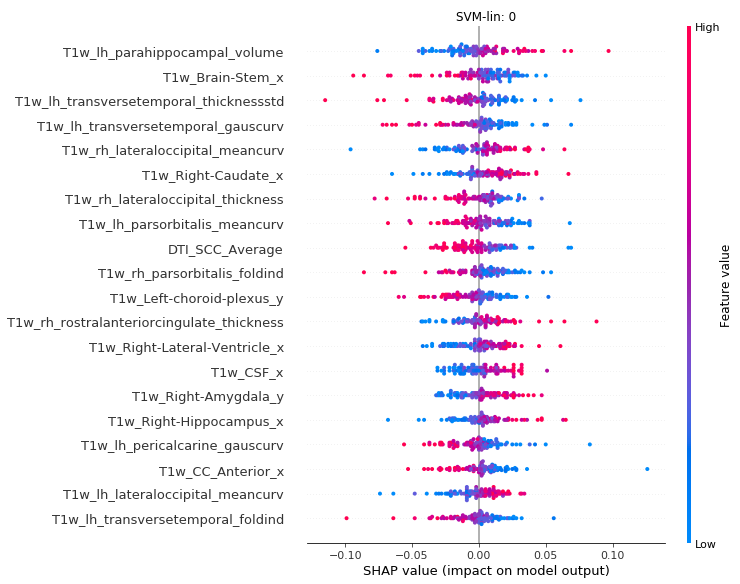

In [5]:
for i in [0]:
    # 
    shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
    plt.title(model_name+": "+str(i))
    # plt.savefig("figures/{}_swarm.pdf".format(model_name+str(i)), bbox_inches='tight')
    plt.savefig(f"figures/SVM-rbf0_holdout_swarm.pdf", bbox_inches='tight')

<b> ROI 03: sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [6]:
sex_mask = data['sex'].astype(bool)[()]

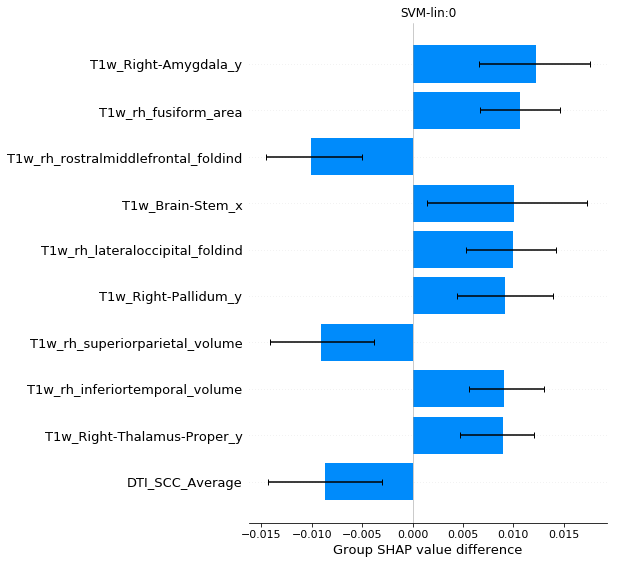

In [7]:
for i in [0]:
    shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
    plt.title(model_name+":"+str(i))
    # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
    plt.savefig("figures/SVM-rbf0_holdout_bar-sexdiff.pdf", bbox_inches='tight')

<b> ROI 03: class difference plot showing shap values vs feature values ordered by feature importance </b>

In [8]:
class_mask = data['Binge'][()].astype(bool)

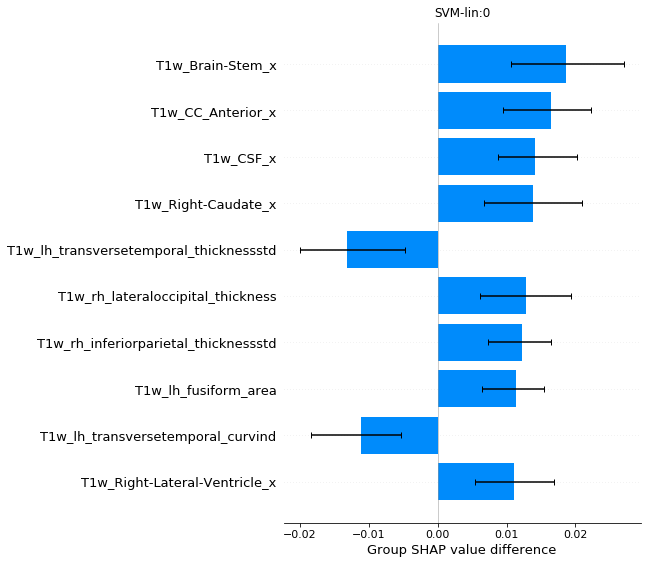

In [9]:
for i in [0]:
    shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
    plt.title(model_name+":"+str(i))
    # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
    plt.savefig("figures/SVM-rbf0_holdout_bar-sexdiff.pdf", bbox_inches='tight')